In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial_data_complete = pd.merge(mouse_data, trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
trial_data_complete.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data = trial_data_complete.groupby(['Drug', 'Timepoint'])
tumor_response = grouped_data["Tumor Volume (mm3)"].mean()
tumor_response

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(tumor_response).reset_index()
tumor_response_mean_df.rename(columns = {'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'}, inplace=True)

# Preview DataFrame
tumor_response_mean_df

,Drug,Timepoint,Mean Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [4]:
##### Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
from scipy.stats import sem

tumor_response_sem_df = pd.DataFrame(trial_data_complete.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'])
tumor_response_sem_df.rename(columns = {'Tumor Volume (mm3)': 'Tumor Volume sem'}, inplace=True)

# Preview DataFrame

tumor_response_sem_df.head()


Tumor Volume sem
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.448593
          10                 0.702684
          15                 0.838617
          20                 0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames

tumor_response_mean_pivot = tumor_response_mean_df.pivot_table(index="Timepoint", columns="Drug", values="Mean Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_response_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [8]:
# Minor Data Munging to Re-Format the Data Frames

tumor_response_sem_pivot = tumor_response_sem_df.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume sem")

# Preview that Reformatting worked
tumor_response_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


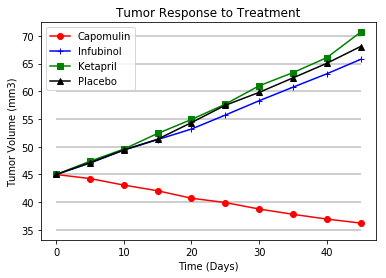

<Figure size 432x288 with 0 Axes>

In [10]:
#### Generate the Plot (with Error Bars)

# variables for 4 drugs
timepoint=[0,5,10,15,20,25,30,35,40,45]
cap_mean = tumor_response_mean_pivot.loc[timepoint, ["Capomulin"]]
inf_mean = tumor_response_mean_pivot.loc[timepoint, ["Infubinol"]]
ket_mean = tumor_response_mean_pivot.loc[timepoint, ["Ketapril"]]
placebo_mean = tumor_response_mean_pivot.loc[timepoint, ["Placebo"]]

cap_sem = tumor_response_sem_pivot.loc[timepoint, ["Capomulin"]]
inf_sem = tumor_response_sem_pivot.loc[timepoint, ["Infubinol"]]
ket_sem = tumor_response_sem_pivot.loc[timepoint, ["Ketapril"]]
placebo_sem = tumor_response_sem_pivot.loc[timepoint, ["Placebo"]]

# error bars
# I could not figure out how to graph my standard error measurements, even after a few hours of work. 
# If I add yerr=cap_sem, I receive the error "unsupported operrand types 'str'".
# But when I try to convert to numeric or using int(), I receive further errors. I tried using the sampling method without success either. 
# To continue on this the homework I am skipping this step. 

# plot

Capomulin, = plt.plot(timepoint, cap_mean, marker ='o', color='red', label = "Capomulin")
Infubinol, = plt.plot(timepoint, inf_mean, marker = '+', color='blue', label = "Infubinol" )
Ketapril, = plt.plot(timepoint, ket_mean, marker = 's', color='green', label = "Ketapril")
Placebo, = plt.plot(timepoint, placebo_mean, marker ='^' , color='black', label = "Placebo")

#Legend
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.legend()

# Title
plt.title("Tumor Response to Treatment")

# axis labels
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# h lines
plt.hlines([35, 40, 45, 50, 55, 60, 65, 70], 0, 45, alpha=0.25)

# Print our chart to the screen
plt.show()

# print picture
plt.savefig("My_Pictures/tumor_response_to_treatment.png")


## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response = grouped_data["Metastatic Sites"].mean()
metastatic_response

# Convert to DataFrame

metastatic_response_mean_df = pd.DataFrame(metastatic_response).reset_index()
metastatic_response_mean_df.rename(columns = {'Metastatic Sites': 'Mean Metastatic Sites'}, inplace=True)

# Preview DataFrame
metastatic_response_mean_df


,Drug,Timepoint,Mean Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metastatic_response_sem_df = pd.DataFrame(trial_data_complete.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'])
metastatic_response_sem_df.rename(columns = {'Metastatic Sites': 'Metastatic Sites sem'}, inplace=True)

# Preview DataFrame

metastatic_response_sem_df


Metastatic Sites sem
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621
...                                   ...
Zoniferol 25                     0.236621
          30                     0.248168
          35                     0.285714
          40                     0.299791
          45                     0.286400

[100 rows x 1 columns]

In [17]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_response_mean_pivot = metastatic_response_mean_df.pivot_table(index="Timepoint", columns="Drug", values="Mean Metastatic Sites")

# Preview that Reformatting worked
metastatic_response_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [18]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_response_sem_pivot = metastatic_response_sem_df.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites sem")

# Preview that Reformatting worked
metastatic_response_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


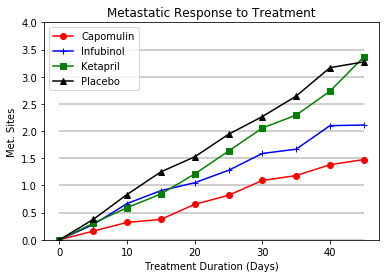

<Figure size 432x288 with 0 Axes>

In [19]:
### Generate the Plot (with Error Bars)

# variables for 4 drugs
cap_met = metastatic_response_mean_pivot.loc[timepoint, ["Capomulin"]]
inf_met = metastatic_response_mean_pivot.loc[timepoint, ["Infubinol"]]
ket_met = metastatic_response_mean_pivot.loc[timepoint, ["Ketapril"]]
placebo_met = metastatic_response_mean_pivot.loc[timepoint, ["Placebo"]]

cap_sem = tumor_response_sem_pivot.loc[timepoint, ["Capomulin"]]
inf_sem = tumor_response_sem_pivot.loc[timepoint, ["Infubinol"]]
ket_sem = tumor_response_sem_pivot.loc[timepoint, ["Ketapril"]]
placebo_sem = tumor_response_sem_pivot.loc[timepoint, ["Placebo"]]

# plots
Capomulin, = plt.plot(timepoint, cap_met, marker ='o', color='red', label = "Capomulin")
Infubinol, = plt.plot(timepoint, inf_met, marker = '+', color='blue', label = "Infubinol" )
Ketapril, = plt.plot(timepoint, ket_met, marker = 's', color='green', label = "Ketapril")
Placebo, = plt.plot(timepoint, placebo_met, marker ='^' , color='black', label = "Placebo")

# error bars - same issue as described above

#Legend
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.legend()

# Title
plt.title("Metastatic Response to Treatment")

# axis labels
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# y range
plt.ylim(0, 4)

# h lines
plt.hlines([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5], 0, 45, alpha=0.25)

# Print our chart to the screen
plt.show()

# print picture
plt.savefig("My_Pictures/metastatic_response_to_treatment.png")

## Survival Rates

In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = grouped_data["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df.rename(columns = {'Mouse ID': 'Mouse Count'}, inplace=True)

# Preview DataFrame
mouse_count_df


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [21]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_pivot = mouse_count_df.pivot_table(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


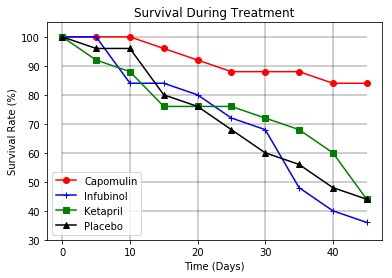

<Figure size 432x288 with 0 Axes>

In [22]:
### Generate the Plot (Accounting for percentages)

# variables for 4 drugs
cap_num = mouse_count_pivot.loc[timepoint, ["Capomulin"]]
inf_num = mouse_count_pivot.loc[timepoint, ["Infubinol"]]
ket_num = mouse_count_pivot.loc[timepoint, ["Ketapril"]]
placebo_num = mouse_count_pivot.loc[timepoint, ["Placebo"]]

cap_percent = cap_num / 25 * 100
inf_percent = inf_num / 25 * 100
ket_percent = ket_num / 25 * 100
placebo_percent = placebo_num / 25 * 100

# plots
Capomulin, = plt.plot(timepoint, cap_percent, marker ='o', color='red', label = "Capomulin")
Infubinol, = plt.plot(timepoint, inf_percent, marker = '+', color='blue', label = "Infubinol" )
Ketapril, = plt.plot(timepoint, ket_percent, marker = 's', color='green', label = "Ketapril")
Placebo, = plt.plot(timepoint, placebo_percent, marker ='^' , color='black', label = "Placebo")

#Legend
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Placebo], loc="best")
plt.legend()

# Title
plt.title("Survival During Treatment")

# axis labels
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# y range
plt.ylim(30, 105)

# h lines
plt.hlines([40, 50, 60, 70, 80, 90, 100], 0, 45, alpha=0.25)

# v lines
plt.vlines([0, 10, 20, 30, 40], 0, 110, alpha=0.25)

# Show the Figure
plt.show()

# Save the Figure
plt.savefig("My_Pictures/survival_during_treatment.png")


## Summary Bar Graph

In [23]:
##### Calculate the percent changes for each drug

# Passing Rate = 80%

tumor_end_values = tumor_response_mean_pivot.loc[45, :]
tumor_begin_values = tumor_response_mean_pivot.loc[0, :]

((tumor_end_values - tumor_begin_values) / tumor_begin_values) * 100

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

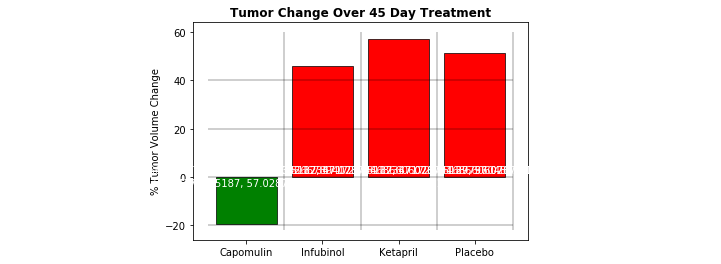

In [30]:
#### Store all Relevant Percent Changes into a Tuple

cap_change = ((tumor_response_mean_pivot.loc[45, 'Capomulin'] - tumor_response_mean_pivot.loc[0, 'Capomulin']) / tumor_response_mean_pivot.loc[0, 'Capomulin']) * 100
inf_change = ((tumor_response_mean_pivot.loc[45, 'Infubinol'] - tumor_response_mean_pivot.loc[0, 'Infubinol']) / tumor_response_mean_pivot.loc[0, 'Infubinol']) * 100
ket_change = ((tumor_response_mean_pivot.loc[45, 'Ketapril'] - tumor_response_mean_pivot.loc[0, 'Ketapril']) / tumor_response_mean_pivot.loc[0, 'Ketapril']) * 100
placebo_change = ((tumor_response_mean_pivot.loc[45, 'Placebo'] - tumor_response_mean_pivot.loc[0, 'Placebo']) / tumor_response_mean_pivot.loc[0, 'Placebo']) * 100

drug_change = (cap_change, inf_change, ket_change, placebo_change)
x_axis = np.arange(len(drug_change))

# Splice the data between passing and failing drugs

colors = []

for drug in drug_change:
    if drug > 0:
        colors.append("red")
    else:
        colors.append("green")

# Orient widths. Add labels, tick marks, etc. 

plt.bar(x_axis, drug_change, color=colors, alpha=1.0, edgecolor='black', linewidth=0.7)

# labels
plt.title("Tumor Change Over 45 Day Treatment", fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel("% Tumor Volume Change")

# lines
plt.hlines([-20, 0, 20, 40], -0.5, 3.5, alpha=0.25)
plt.vlines([0.5, 1.5, 2.5, 3.5], -22, 60, alpha=0.25)

# tick marks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

# Use functions to label the percentages of changes

count = 0

for drug in drug_change:
    if drug < 0:
        y = -3.5
    else:
        y = 2
    plt.text(count, y, str([cap_change, inf_change, ket_change, placebo_change]) + '%', ha = 'center', color = 'white')
    count += 1 
    
#for some reason it prints repeated values on top of each other instead of the single value

# Save the Figure
plt.savefig("My_Pictures/summary_bar_graph.png")

# Show the Figure
plt.show()